# Julia for Data Science
Based on a tutorial by [@nassarhuda](https://github.com/nassarhuda)! 😃

In this tutorial, we will discuss why *Julia* is the tool you want to use for your data science applications.

We will cover the following:
* **Data**
* Data processing
* Visualization

### Data: Build a strong relationship with your data.
Every data science task has one main ingredient, the _data_! Most likely, you want to use your data to learn something new. But before the _new_ part, what about the data you already have? Let's make sure you can **read** it, **store** it, and **understand** it before you start using it.

Julia makes this step really easy with data structures and packages to process the data, as well as, existing functions that are readily usable on your data. 

The goal of this first part is get you acquainted with some Julia's tools to manage your data.

In [1]:
using Pkg
Pkg.activate(".")
Pkg.add("CSV")
Pkg.add("DataFrames")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `Project.toml`
  [336ed68f] + CSV v0.4.2
  Updating `Manifest.toml`
  [336ed68f] + CSV v0.4.2
  [69de0a69] + Parsers v0.2.11
 Resolving package versions...
  Updating `Project.toml`
 [no changes]
  Updating `Manifest.toml`
 [no changes]


First, let's download a csv file from github that we can work with.

Note: `download` depends on external tools such as curl, wget or fetch. So you must have one of these.

In [2]:
P = download("https://raw.githubusercontent.com/nassarhuda/easy_data/master/programming_languages.csv","programminglanguages.csv")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   876  100   876    0     0   1093      0 --:--:-- --:--:-- --:--:--     0-- --:--:--  1092


"programminglanguages.csv"

We can use shell commands like `ls` in Julia by preceding them with a semicolon.

In [3]:
;ls

1. Julia for Data Science - Data.ipynb
Fundamentals.ipynb
JuliaBoxTutorials
ML.ipynb
Manifest.toml
Parallel.ipynb
Project.toml
README.md
Snap_graph.ipynb
UserGuide
godbolt_loopit.png
graphs.ipynb
karate.txt
ml.jl
ml_ode.jl
programminglanguages.csv
triangles.ipynb
uf_colors.png


And there's the *.csv file we downloaded!

By default, `readcsv` will fill an array with the data stored in the input .csv file. If we set the keyword argument `header` to `true`, we'll get a second output array.

In [4]:
using CSV, DataFrames

In [5]:
P = CSV.read("programminglanguages.csv",sink=DataFrame)
H = names(P)
P

,year,language
,Int64⍰,String⍰
1,1951,Regional Assembly Language
2,1952,Autocode
3,1954,IPL
4,1955,FLOW-MATIC
5,1957,FORTRAN
6,1957,COMTRAN
7,1958,LISP
8,1958,ALGOL 58
9,1959,FACT


Here we write our first small function. <br>
Now you can answer questions such as, "when was language X created?"

In [6]:
function language_created_year(P,language::String)
    loc = findall(P[2].==language)
    return P[1][loc]
end

language_created_year (generic function with 1 method)

In [7]:
language_created_year(P,"Julia")

1-element Array{Union{Missing, Int64},1}:
 2012

In [8]:
language_created_year(P,"julia")

0-element Array{Union{Missing, Int64},1}

As expected, this will not return what you want, but thankfully, string manipulation is really easy in Julia!

In [9]:
function language_created_year_v2(P,language::String)
    loc = findall(lowercase.(P[2]).==lowercase.(language))
    return P[loc,1]
end
language_created_year_v2(P,"julia")

1-element Array{Union{Missing, Int64},1}:
 2012

**Reading and writing to files is really easy in Julia.** <br>

You can use different delimiters with the function `readdlm` (`readcsv` is just an instance of `readdlm`). <br>

To write to files, we can use `writecsv` or `writedlm`. <br>

Let's write this same data to a file with a different delimiter.

In [10]:
CSV.write("programming_languages_data.txt", P, delim='-')

"programming_languages_data.txt"

We can now check that this worked using a shell command to glance at the file,

In [11]:
;head -n 10 programming_languages_data.txt

year-language
1951-Regional Assembly Language
1952-Autocode
1954-IPL
1955-"FLOW-MATIC"
1957-FORTRAN
1957-COMTRAN
1958-LISP
1958-ALGOL 58
1959-FACT


and also check that we can use `readdlm` to read our new text file correctly.

In [12]:
P_new_delim = CSV.read("programming_languages_data.txt", delim='-');
P == P_new_delim

true

### Dictionaries
Let's try to store the above data in a dictionary format!

First, let's initialize an empty dictionary

In [13]:
dict = Dict{Integer,Vector{String}}()

Dict{Integer,Array{String,1}} with 0 entries

Here we told Julia that we want `dict` to only accept integers as keys and vectors of strings as values.

However, we could have initialized an empty dictionary without providing this information (depending on our application).

In [14]:
dict2 = Dict()

Dict{Any,Any} with 0 entries

This dictionary takes keys and values of any type!

Now, let's populate the dictionary with years as keys and vectors that hold all the programming languages created in each year as their values.

In [15]:
for i = 1:size(P,1)
    year,lang = P[:year][i], P[:language][i]
    
    if year in keys(dict)
        dict[year] = push!(dict[year],lang)
    else
        dict[year] = [lang]
    end
end

Now you can pick whichever year you want and find what programming languages were invented in that year

In [16]:
dict[2003]

2-element Array{String,1}:
 "Groovy"
 "Scala" 

`DataFrames` provides the `describe` can give you quick statistics about each column in your dataframe 

In [17]:
describe(df)

UndefVarError: UndefVarError: df not defined

### RDatasets

We can use RDatasets to play around with pre-existing datasets

In [18]:
Pkg.add("RDatasets")
using RDatasets
iris = dataset("datasets", "iris")

 Resolving package versions...
  Updating `Project.toml`
  [ce6b1742] + RDatasets v0.6.1
  Updating `Manifest.toml`
  [8f5d6c58] + EzXML v0.9.0
  [5789e2e9] + FileIO v1.0.2
  [78c3b35d] + Mocking v0.5.7
  [4d1e1d77] + Nullables v0.0.8
  [df47a6cb] + RData v0.5.0
  [ce6b1742] + RDatasets v0.6.1
  [f269a46b] + TimeZones v0.8.2


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


Note that data loaded with `dataset` is stored as a DataFrame. 😃

In [19]:
typeof(iris) 

DataFrame

The summary we get from `describe` on `iris` gives us a lot more information than the summary on `df`!

In [20]:
describe(iris)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,SepalLength,5.84333,4.3,5.8,7.9,,,Float64
2,SepalWidth,3.05733,2.0,3.0,4.4,,,Float64
3,PetalLength,3.758,1.0,4.35,6.9,,,Float64
4,PetalWidth,1.19933,0.1,1.3,2.5,,,Float64
5,Species,,setosa,,virginica,3,,CategoricalString{UInt8}


### `DataArrays`

You can create `DataArray`s as follows

### FileIO

In [21]:
Pkg.add.(["FileIO", "ImageMagick", "QuartzImageIO", "Images"])
using FileIO
using Images
julialogo = download("https://avatars0.githubusercontent.com/u/743164?s=200&v=4","julialogo.png")

 Resolving package versions...
  Updating `Project.toml`
  [5789e2e9] + FileIO v1.0.2
  Updating `Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `Project.toml`
  [6218d12a] + ImageMagick v0.7.1
  Updating `Manifest.toml`
  [621f4979] + AbstractFFTs v0.3.2
  [8f4d0f93] + Conda v1.1.1
  [7a1cc6ca] + FFTW v0.2.4
  [a2bd30eb] + Graphics v0.4.0
  [a09fc81d] + ImageCore v0.7.3
  [6218d12a] + ImageMagick v0.7.1
  [dbb5928d] + MappedArrays v0.2.1
  [6fe1bfb0] + OffsetArrays v0.8.1
  [5432bcbf] + PaddedViews v0.4.2
  [81def892] + VersionParsing v1.1.3
 Resolving package versions...
  Updating `Project.toml`
  [dca85d43] + QuartzImageIO v0.5.0
  Updating `Manifest.toml`
  [c3611d14] + ColorVectorSpace v0.6.2
  [dca85d43] + QuartzImageIO v0.5.0
 Resolving package versions...
  Updating `Project.toml`
  [916415d5] + Images v0.16.1
  Updating `Manifest.toml`
  [13072b0f] + AxisAlgorithms v0.3.0
  [39de3d68] + AxisArrays v0.3.0
  [aafaddc9] + CatIndices v0.2.0
  [ed09eef8] + 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12791  100 12791    0     0  50160      0 --:--:-- --:--:-- --:--:-- 50358


"julialogo.png"

Next, let's load the Julia logo, stored as a .png file

In [22]:
X1 = load("julialogo.png");

We see below that Julia stores this logo as an array of colors.

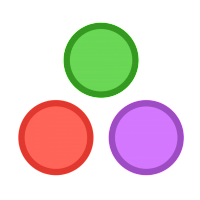

In [23]:
Images.colorview(RGBA, X1)

In [24]:
@show typeof(X1);
@show size(X1);

typeof(X1) = Array{RGBA{Normed{UInt8,8}},2}
size(X1) = (200, 200)


In [25]:
oraaaange = RGB(250/255,70/255,22/255)
bluuuuuee = RGB(0,33/255, 165/255);

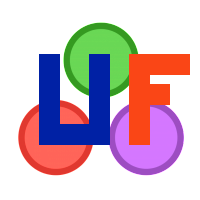

In [26]:
X1[55:145,130:150] .= oraaaange
X1[125:145,60:100] .= bluuuuuee
X1[85:105,150:170] .= oraaaange
X1[55:145,90:110]  .= bluuuuuee
X1[55:75,150:190]  .= oraaaange
X1[55:145,40:60]   .= bluuuuuee
colorview(RGBA, X1)